# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis 
There is not much correlation between latitude and humidity.
There is not much correlation between latitude and cloudiness.
There is not much correlation between latitude and wind speed.
* Detailed information below

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
api_key = weather_api_key

#Set temperature to Fahrenheit
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set lists for dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial count quantities
count_one = 0
set_one = 1

# Create loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | liku
Processing Record 7 of Set 1 | hearst
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | tygda
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mehamn
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | houma
Processing Record 21 of Set 1 | chicama
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 1 | farim
Processing Record 24 of Set 1 | waingapu
Processing Record 25 of Set 1 | diks

Processing Record 39 of Set 4 | aitape
City not found. Skipping...
Processing Record 40 of Set 4 | nadvoitsy
Processing Record 41 of Set 4 | mitsamiouli
Processing Record 42 of Set 4 | cap-chat
Processing Record 43 of Set 4 | torrevieja
Processing Record 44 of Set 4 | cayenne
Processing Record 45 of Set 4 | tawang
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | praya
Processing Record 48 of Set 4 | durres
Processing Record 49 of Set 4 | coquimbo
Processing Record 1 of Set 5 | tifesti
Processing Record 2 of Set 5 | solnechnyy
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | gizo
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | sassandra
Processing Record 8 of Set 5 | duvan
Processing Record 9 of Set 5 | cockburn town
City not found. Skipping...
Processing Record 10 of Set 5 | lata
Processing Record 11 of Set 5 | umea
City not found. Skipping...
Processing Record 12 of Set 5 | warren
P

Processing Record 28 of Set 8 | puerto escondido
Processing Record 29 of Set 8 | okhotsk
Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | genhe
Processing Record 32 of Set 8 | glyadyanskoye
Processing Record 33 of Set 8 | saint-georges
Processing Record 34 of Set 8 | zaraza
Processing Record 35 of Set 8 | buchanan
Processing Record 36 of Set 8 | halifax
Processing Record 37 of Set 8 | manggar
Processing Record 38 of Set 8 | rundu
Processing Record 39 of Set 8 | sisimiut
Processing Record 40 of Set 8 | clemencia
Processing Record 41 of Set 8 | neuquen
Processing Record 42 of Set 8 | san antonio
Processing Record 43 of Set 8 | taywarah
Processing Record 44 of Set 8 | spearfish
Processing Record 45 of Set 8 | okato
City not found. Skipping...
Processing Record 46 of Set 8 | nemuro
Processing Record 47 of Set 8 | bairiki
Processing Record 48 of Set 8 | gien
Processing Record 49 of Set 8 | sao felix do xingu
Processing Record 1 of Set 9 | sobolevo
Processing Record 2 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dictionary for establishing dataframe
weather_dictionary = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# Establish dataframe
weather_dataframe = pd.DataFrame(weather_dictionary)

# Export to csv
weather_dataframe.to_csv('cities.csv',encoding = 'utf-8',index = False)

weather_dataframe.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Latitude      548
Longitude     548
Max Temp      548
Wind Speed    548
dtype: int64

In [5]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,33,PF,1635121291,76,-23.1203,-134.9692,74.59,17.60
1,nikolskoye,90,RU,1635121291,77,59.7035,30.7861,35.87,8.08
2,ilulissat,81,GL,1635121292,72,69.2167,-51.1000,0.23,7.63
3,taltal,23,CL,1635121292,77,-25.4000,-70.4833,60.78,3.76
4,airai,97,TL,1635121293,51,-8.9266,125.4092,72.75,1.66


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

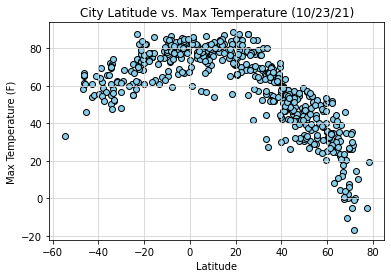

In [6]:
plt.scatter(weather_dataframe["Latitude"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/figure1.png")
plt.show()

The City Latitude vs. Max Temperature scatterplot is analyzing the temperature as it relates to its relation to the equator. This scatterplot shows that temperatures drop tremendously near the 40˚ latitude mark.

## Latitude vs. Humidity Plot

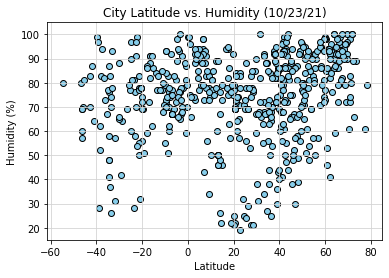

In [7]:
plt.scatter(weather_dataframe["Latitude"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/figure2.png")
plt.show()

The City Latitude vs. Humidity scatterplot is analyzing the humidity levels as it relates to its relation to the equator. This scatterplot shows that there is not much correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

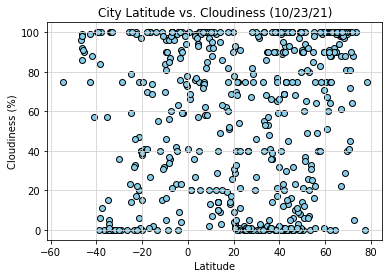

In [8]:
plt.scatter(weather_dataframe["Latitude"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/figure3.png")
plt.show()

The City Latitude vs. Cloudiness scatterplot is analyzing the overcast levels as it relates to its relation to the equator. This scatterplot shows that there is not much correlation between latitude and the overcast levels (cloudiness).

## Latitude vs. Wind Speed Plot

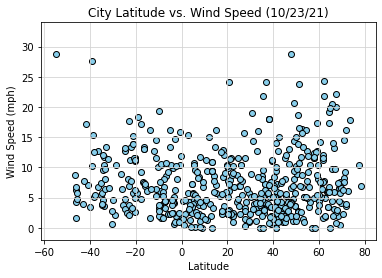

In [9]:
plt.scatter(weather_dataframe["Latitude"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/figure4.png")
plt.show()

The City Latitude vs. Wind Speed scatterplot is analyzing the speed of wind as it relates to its relation to the equator. This scatterplot shows that there is not much correlation between latitude and wind speed.

## Linear Regression

In [10]:
#linear regression by hemisphere

#create northern and southern df
north_hemi_df = weather_dataframe.loc[(weather_dataframe['Latitude']>0)]
south_hemi_df = weather_dataframe.loc[(weather_dataframe['Latitude'] < 0)]

In [11]:
north_hemi_df.count()

City          397
Cloudiness    397
Country       397
Date          397
Humidity      397
Latitude      397
Longitude     397
Max Temp      397
Wind Speed    397
dtype: int64

In [12]:
south_hemi_df.count()

City          151
Cloudiness    151
Country       151
Date          151
Humidity      151
Latitude      151
Longitude     151
Max Temp      151
Wind Speed    151
dtype: int64

In [13]:
# Define function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8702688587227525


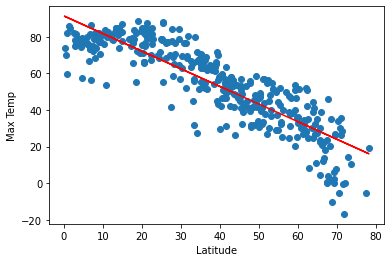

<Figure size 432x288 with 0 Axes>

In [14]:
x = north_hemi_df['Latitude']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')
plt.savefig("Figures/figure5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7194000742866064


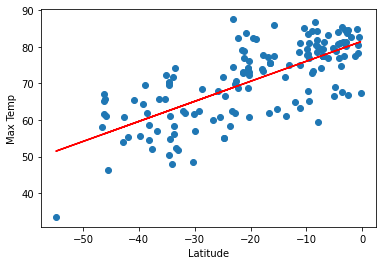

<Figure size 432x288 with 0 Axes>

In [15]:
x = south_hemi_df['Latitude']
y = south_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')
plt.savefig("Figures/figure6.png")

When it comes to the maximum temperature as it relates to the latitude, the Northern hemisphere displays a strong negative relationship between the two meaning temperatures decrease the further from the equator a city lies. The southern hemisphere displays the opposite with there being a strong positive relationship between the two meaning temperatures increase the closer to the equator a city lies.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.19028309999992069


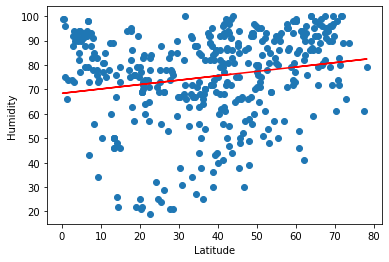

<Figure size 432x288 with 0 Axes>

In [16]:
x = north_hemi_df['Latitude']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')
plt.savefig("Figures/figure7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.19029590567859522


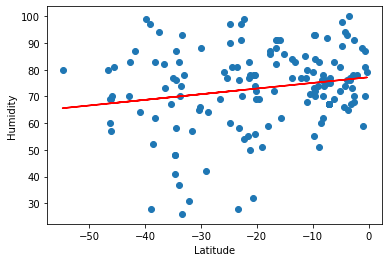

<Figure size 432x288 with 0 Axes>

In [17]:
x = south_hemi_df['Latitude']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')
plt.savefig("Figures/figure8.png")

When it comes to the humidity levels as it relates to the latitude, the northern hemisphere nor southern hemisphere display a strong correlation between humidity levels and equatorial geolocation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.13760524084847991


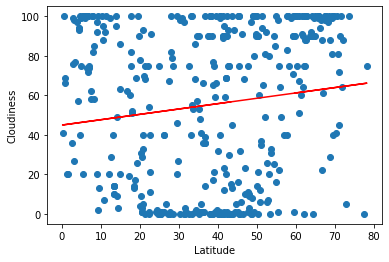

<Figure size 432x288 with 0 Axes>

In [18]:
x = north_hemi_df['Latitude']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')
plt.savefig("Figures/figure9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.19063057320425994


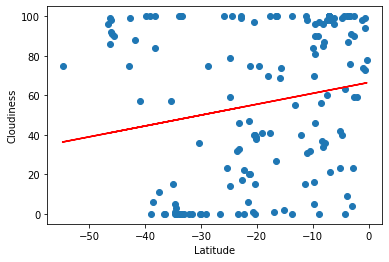

<Figure size 432x288 with 0 Axes>

In [19]:
x = south_hemi_df['Latitude']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')
plt.savefig("Figures/figure10.png")

When it comes to the overcast levels as it relates to the latitude, the northern hemisphere nor southern hemisphere display a strong correlation between cloudiness and equatorial geolocation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.20048813056690185


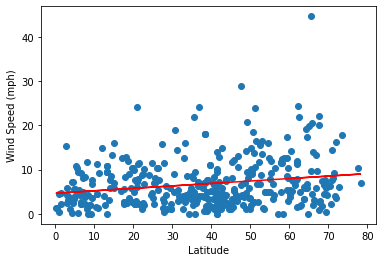

<Figure size 432x288 with 0 Axes>

In [20]:
x = north_hemi_df['Latitude']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')
plt.savefig("Figures/figure11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.19100568973981746


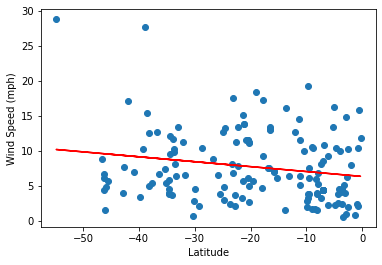

<Figure size 432x288 with 0 Axes>

In [21]:
x = south_hemi_df['Latitude']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')
plt.savefig("Figures/figure12.png")

When it comes to the speed of wind as it relates to the latitude, the northern hemisphere nor southern hemisphere display a strong correlation between wind speed and equatorial geolocation. 